# IMPORT LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from src.data_viz_functions import plot_distributions, plot_correlation_heatmap

In [2]:
df_train = pd.read_csv('Data/train.csv', sep=',')

df_train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
# Remove id column

id_column = df_train['id']

df_train = df_train.drop('id', axis=1)

In [6]:
# Categorical Features

df_train['Vehicle_Age'].value_counts(), df_train['Vehicle_Damage'].value_counts(), df_train['Gender'].value_counts()

(Vehicle_Age
 1-2 Year     200316
 < 1 Year     164786
 > 2 Years     16007
 Name: count, dtype: int64,
 Vehicle_Damage
 Yes    192413
 No     188696
 Name: count, dtype: int64,
 Gender
 Male      206089
 Female    175020
 Name: count, dtype: int64)

In [7]:
# Target Label

df_train['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

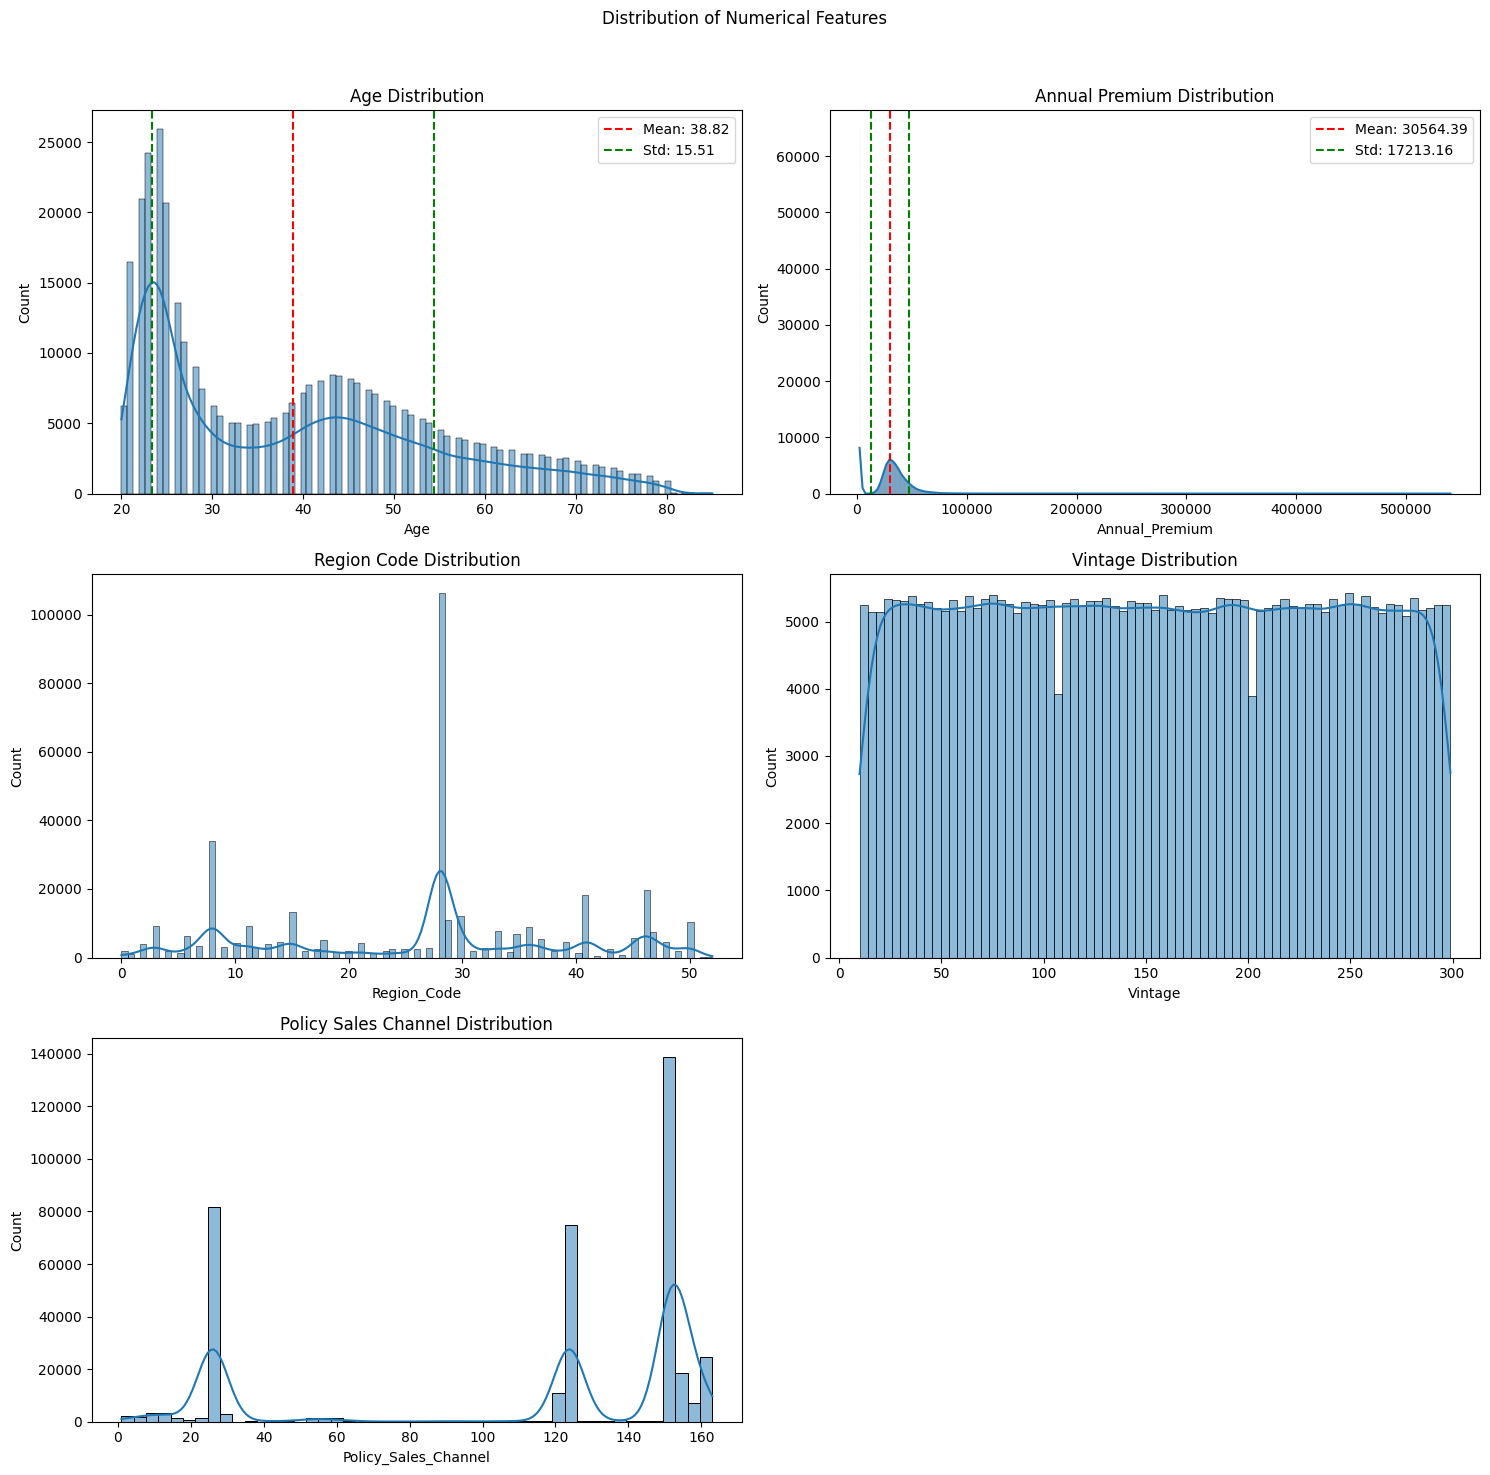

In [8]:
# Show numerical feature distributions

plot_distributions(df_train)

/var/folders/8d/09j2zdrx7klfl7nffqz630000000gn/T/ipykernel_3909/2035285291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions_gt_10000.index, y=regions_gt_10000.values, palette="viridis")


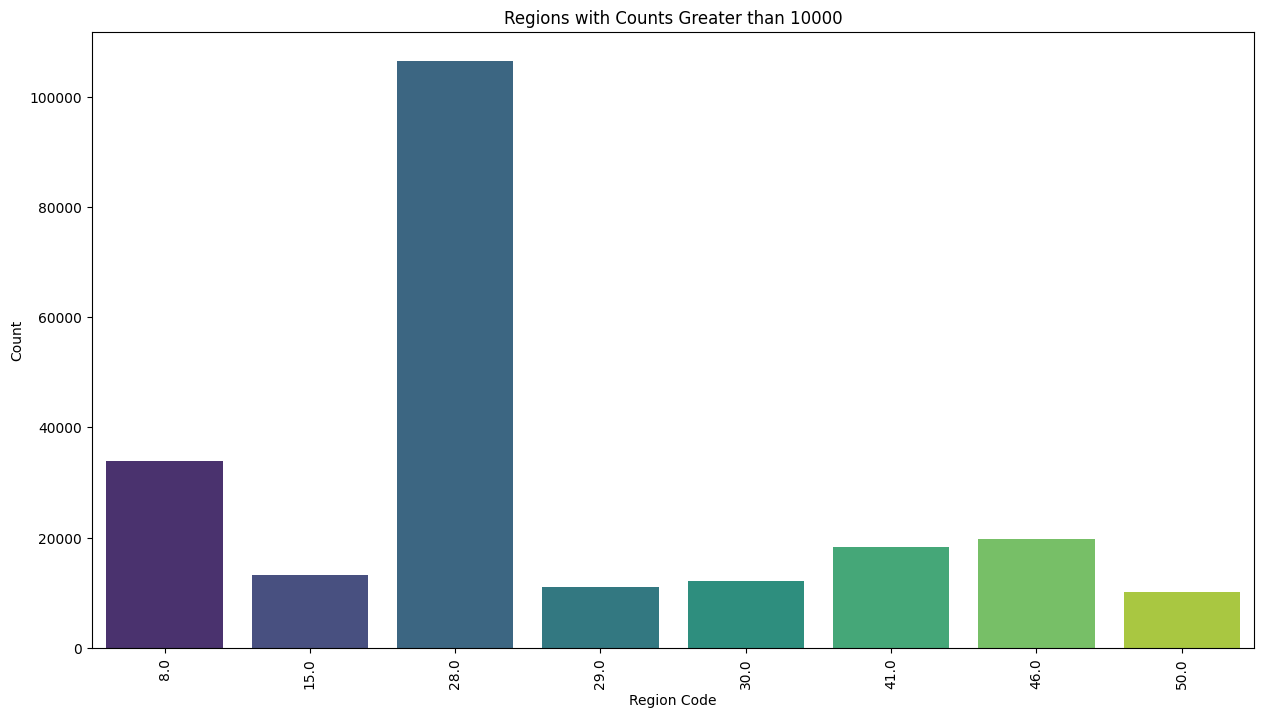

In [19]:
# Count the occurrences of each region
region_counts = df_train['Region_Code'].value_counts()

# Filter regions with counts greater than 1000
regions_gt_10000 = region_counts[region_counts > 10000]

# Plot the regions with counts greater than 1000
plt.figure(figsize=(15, 8))
sns.barplot(x=regions_gt_10000.index, y=regions_gt_10000.values, palette="viridis")
plt.title('Regions with Counts Greater than 10000')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/var/folders/8d/09j2zdrx7klfl7nffqz630000000gn/T/ipykernel_3909/4203025853.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=policy_gt_20000.index, y=policy_gt_20000.values, palette="viridis")


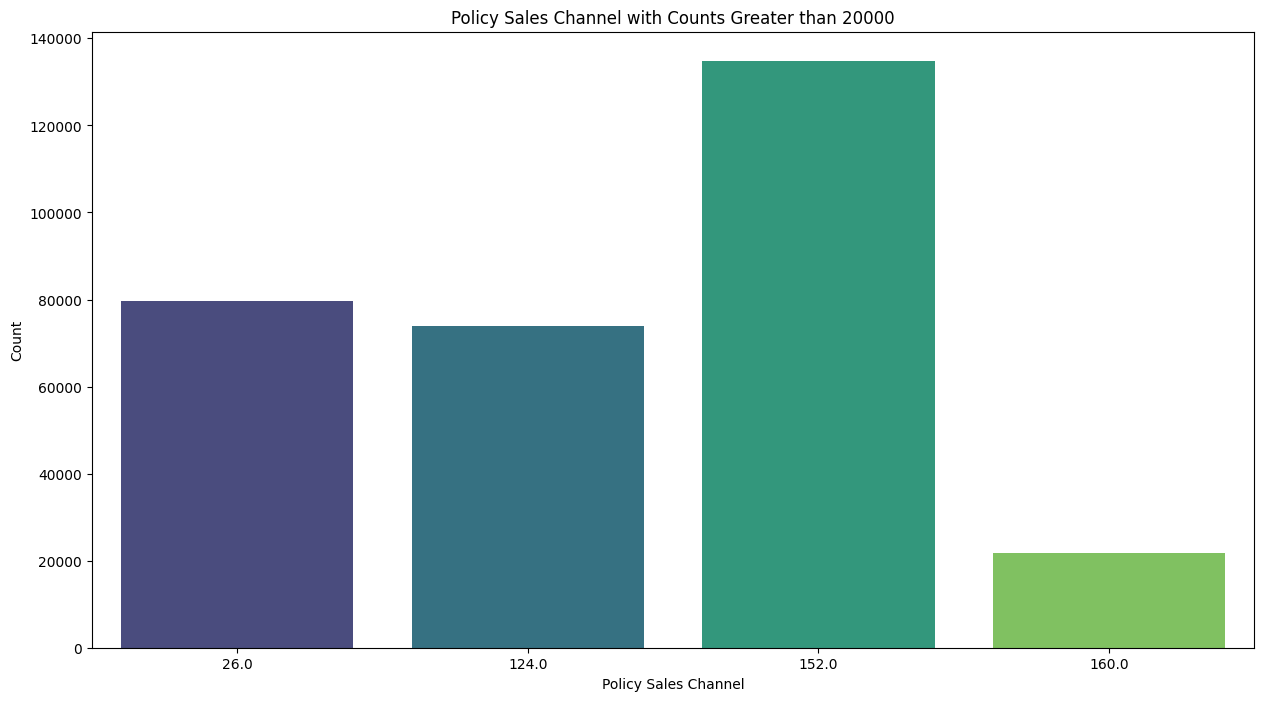

In [18]:
# Count the occurrences of each region
policy_counts = df_train['Policy_Sales_Channel'].value_counts()

policy_gt_20000 = policy_counts[policy_counts > 20000]

plt.figure(figsize=(15, 8))
sns.barplot(x=policy_gt_20000.index, y=policy_gt_20000.values, palette="viridis")
plt.title('Policy Sales Channel with Counts Greater than 20000')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

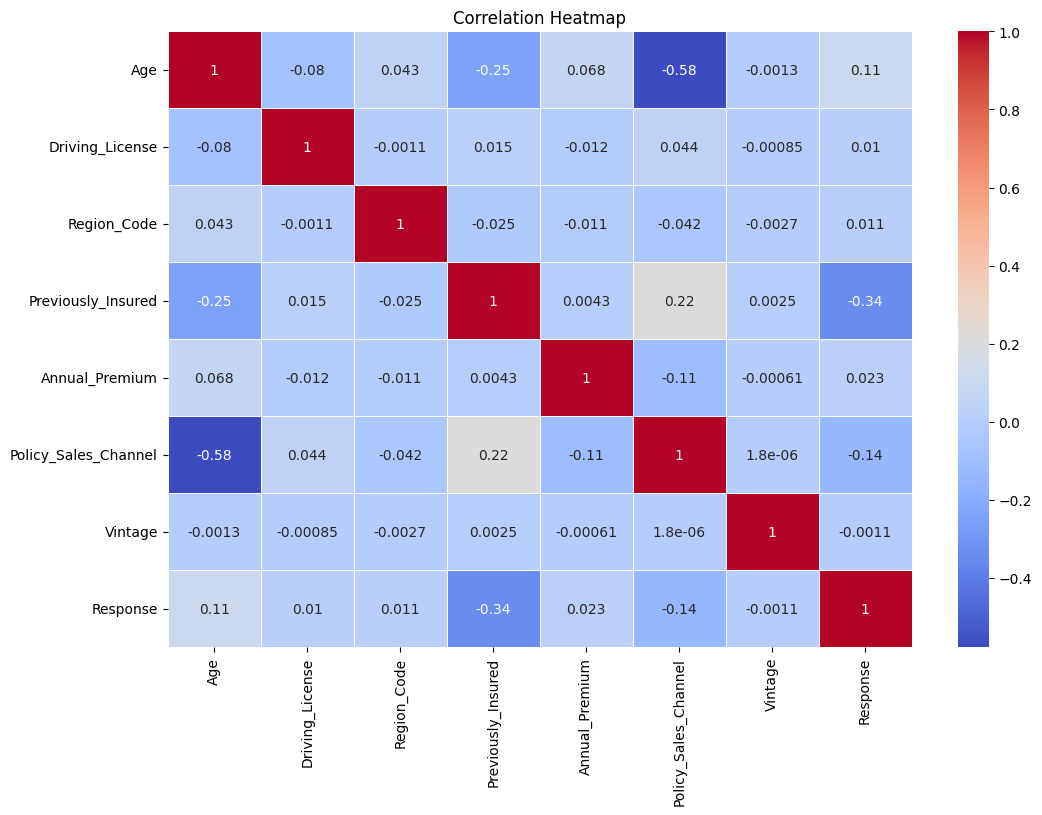

In [10]:
# Correlation Heatmap for numerical features 

numerical_features = df_train.select_dtypes(exclude=['object']).columns
correlation_matrix_numerical = df_train[numerical_features].corr()

plot_correlation_heatmap(correlation_matrix_numerical)

In [11]:
# Data Encoding

data_encoded = df_train.copy()
data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 1, 'Female': 0})
data_encoded['Vehicle_Age'] = data_encoded['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
data_encoded['Vehicle_Damage'] = data_encoded['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

data_encoded.head()

                        Gender       Age  Driving_License  Region_Code  \
Gender                1.000000  0.145545        -0.018374     0.000604   
Age                   0.145545  1.000000        -0.079782     0.042574   
Driving_License      -0.018374 -0.079782         1.000000    -0.001081   
Region_Code           0.000604  0.042574        -0.001081     1.000000   
Previously_Insured   -0.081932 -0.254682         0.014969    -0.024659   
Vehicle_Age           0.160427  0.765790        -0.037306     0.043778   
Vehicle_Damage        0.091606  0.267534        -0.016622     0.028235   
Annual_Premium        0.003673  0.067507        -0.011906    -0.010588   
Policy_Sales_Channel -0.111159 -0.577826         0.043731    -0.042420   
Vintage              -0.002517 -0.001264        -0.000848    -0.002750   
Response              0.052440  0.111147         0.010155     0.010570   

                      Previously_Insured  Vehicle_Age  Vehicle_Damage  \
Gender                         -0.0819